# Welcome to the Pandas Tutorial

In [2]:
# Em Jupyter, usamos "!" para rodar comandos de CLI
# No código abaixo, buscamos onde que está rodando nosso Python
!where python

c:\Users\Claudenir\anaconda3\envs\pandas-tutorial\python.exe
C:\Users\Claudenir\Documents\anaconda3\python.exe
C:\Users\Claudenir\AppData\Local\Programs\Python\Python312\python.exe
C:\Users\Claudenir\AppData\Local\Microsoft\WindowsApps\python.exe


In [3]:
%matplotlib inline

## Imports

In [89]:
import pandas as pdf

## Load Data

In [6]:
# Aqui transforma o arquivo csv em um DataFrame (basicamente uma table de um database ou uma planilha de Excel)
df = pd.read_csv('../../Datasets/world-happiness/2019.csv')

In [7]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## Inspect Data

### Look at the first 5 rows

In [8]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Look at the shape of our data

In [13]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}\nNumber of Cols: {num_cols}")

Number of rows: 156
Number of Cols: 9


### Checking the data types of our columns

In [15]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

### Describe the data

In [16]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### Info of the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


# The Difference Between Pandas Series and DataFrame

Pandas provides two main data structures:

- **Series**: a one-dimensional labeled array
- **DataFrame**: a two-dimensional labeled table

Understanding the difference between them is fundamental for data analysis, data science, and machine learning.


## 1. Pandas Series

A **Series** is a one-dimensional data structure.
It represents a single column of data with an associated index.

Key characteristics:
- One-dimensional
- Has values and an index
- Similar to a column in Excel


In [23]:
# Type of a Column
type(df['Country or region'])

pandas.core.series.Series

## 2. Pandas DataFrame

A **DataFrame** is a two-dimensional data structure made of multiple Pandas Series.

Each column in a DataFrame is a Series, and all Series share the same index.

Key characteristics:
- Two-dimensional (rows and columns)
- Different columns can have different data types
- Similar to an Excel spreadsheet or SQL table


In [24]:
# Type of a DataFrame
type(df)

pandas.core.frame.DataFrame

## 3. Relationship Between DataFrame and Series

A very important concept:

- A DataFrame column is a Pandas Series


# Section #1 - Working with one dataset

## Question #1 - What is the average, min, and max happiness score?

In [ ]:
# In this case, we can use the describe method in the Score Column
df['Score'].describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

In [31]:
# Otherwise, we can use different methods, like 'mean', 'min', 'max'.
mean_score = df['Score'].mean()
min_score = df['Score'].min()
max_score = df['Score'].max()

print(
    f"The answer is:\nAverage:{mean_score:.4}\nMin:{min_score}\nMax:{max_score}")

The answer is:
Average:5.407
Min:2.853
Max:7.769


## Question #2 - What is the score for the Brazil?

### Option #1 - Use Bracket notation filtering

In [32]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [37]:
# Create a boolean mask
brazil_boolean_mask = df['Country or region'] == 'Brazil'
brazil_boolean_mask

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Name: Country or region, Length: 156, dtype: bool

In [39]:
df[brazil_boolean_mask]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
31,32,Brazil,6.3,1.004,1.439,0.802,0.39,0.099,0.086


In [41]:
# It's only one row, but it stills a DataFrame
type(df[brazil_boolean_mask])

pandas.core.frame.DataFrame

In [47]:
# So we can use methods of DataFrames, in this example, we're going to get the Score of Brazil
brazil_score = df[brazil_boolean_mask]['Score']

print(f"The Score of Brazil is: {brazil_score}")

The Score of Brazil is: 31    6.3
Name: Score, dtype: float64


In [48]:
# It returns an Panda Series, to access the value itself we have to do this way, which return an numpy array
brazil_score = df[brazil_boolean_mask]['Score'].values

print(f"The Score of Brazil is: {brazil_score}")

The Score of Brazil is: [6.3]


In [49]:
# So to filter only the value itself, we pass the [0]
brazil_score = df[brazil_boolean_mask]['Score'].values[0]

print(f"The Score of Brazil is: {brazil_score}")

The Score of Brazil is: 6.3


In [57]:
# In only one line of code
df[df['Country or region'] == 'Brazil']['Score'].values[0]

np.float64(6.3)

### Option #2 - Use Indices with _.iloc_ and _.loc_

**_iloc is a way to access data in a DataFrame by the numeric position of the rows and columns**

In [59]:
# Index 0, second column
df.iloc[0, 1]

'Finland'

**_loc is a way to access data in a Dataframe by the name of the Index and the Column**

In [66]:
# First, we have to alter the index to the Country Name
country_name_index = df.set_index(['Country or region'])
country_name_index

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [67]:
# Then, we pass the .loc method to return the filtered row
country_name_index.loc['Brazil']

Overall rank                    32.000
Score                            6.300
GDP per capita                   1.004
Social support                   1.439
Healthy life expectancy          0.802
Freedom to make life choices     0.390
Generosity                       0.099
Perceptions of corruption        0.086
Name: Brazil, dtype: float64

In [68]:
# We can improve the filter passing the Column name
country_name_index.loc['Brazil', 'Score']

np.float64(6.3)

## Question #3 - What is the country with highest Generosity score?

### Option #1 - Use sort values

In [80]:
highest_generosity_country = df.sort_values(
    by='Generosity', ascending=False).iloc[0, 1]

print(
    f'The country with the Highest Generosity is: {highest_generosity_country}.\nThe Generosity there is: {country_name_index.loc['Myanmar', 'Generosity']}')

The country with the Highest Generosity is: Myanmar.
The Generosity there is: 0.566


### Option #2 - Use argmax

In [83]:
max_generosity_idx = df['Generosity'].argmax()
df.iloc[max_generosity_idx, 1]

'Myanmar'

## Question #4 - What does the distribution of happiness scores look like?

<Axes: >

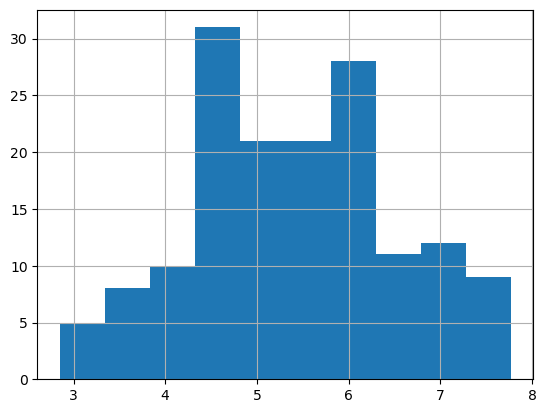

In [88]:
score_column = df['Score']
score_column.hist()

## Question #5 - What does the distribution of all our columns look like?


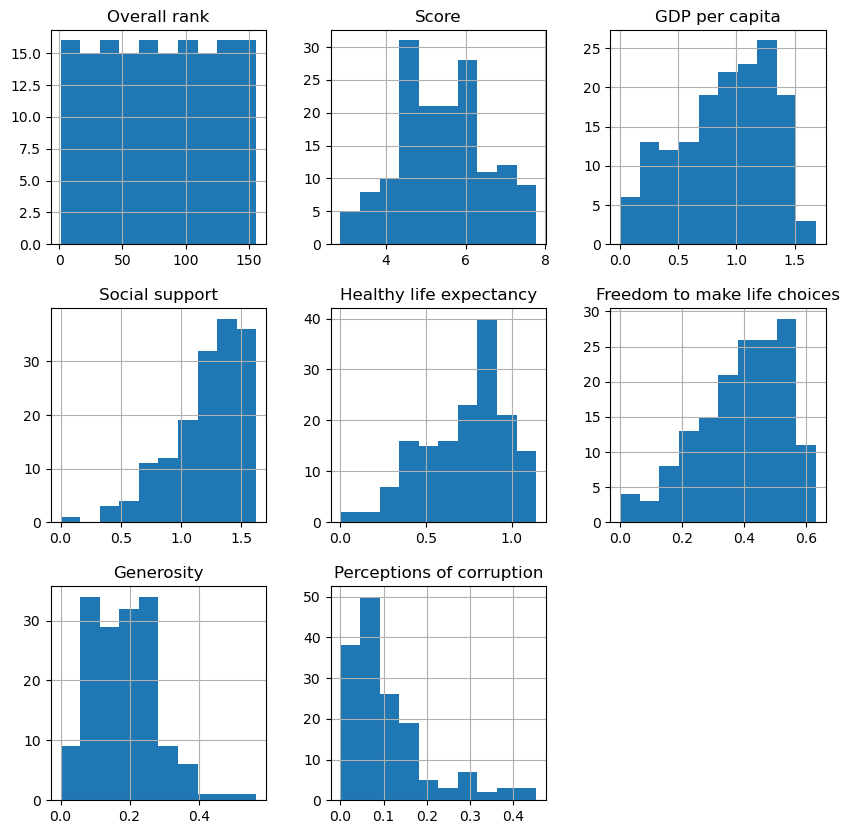

In [94]:
# We assign it in some throwaray variable, the conventional is underscore '_'
_ = df.hist(figsize=(10, 10))

## Question #5 - What is the relationship between social support and happiness score?

<Axes: title={'center': 'Relationship between social support and happiness'}, xlabel='Social support', ylabel='Score'>

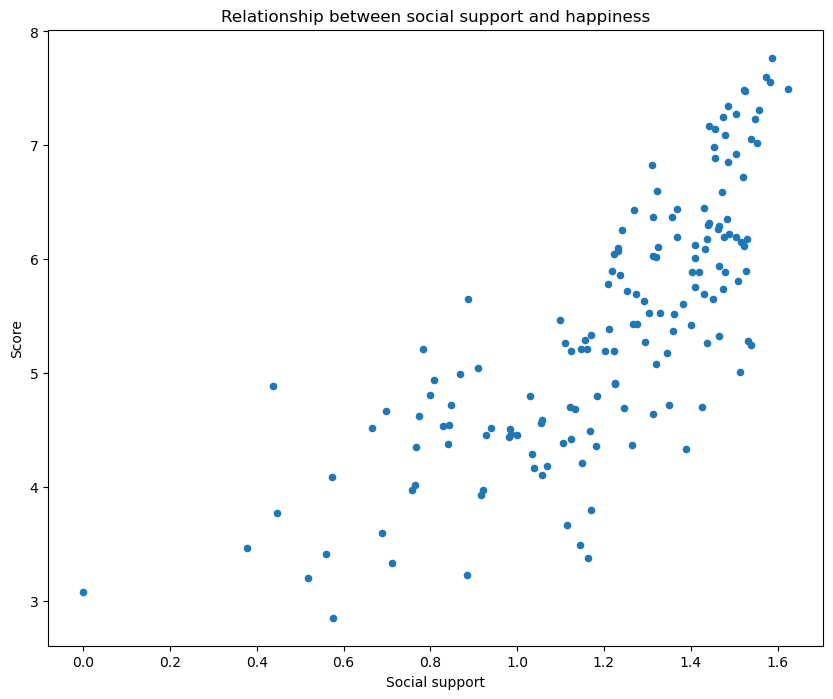

In [99]:
df.plot(x='Social support', y='Score',
        title='Relationship between social support and happiness', kind='scatter', figsize=(10, 8))

## Question #6 - What if we wanted to have the Score go from 0 to 100 rather than 0 to 10?

In [100]:
df_copy = df.copy()

In [101]:
df_copy['Score out of 100'] = df['Score'] * 10

df_copy

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score out of 100
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,77.69
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,76.00
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75.54
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,74.94
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,74.88
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,33.34
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,32.31
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,32.03
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,30.83
